In [55]:
from sklearn import preprocessing

In [56]:
import numpy as np

In [57]:
X = np.array([[0.,0.,5.,13.,9.,1.],[0.,0.,13.,15.,10.,15.],[0.,3.,15.,2.,0.,11.]])

In [58]:
print(preprocessing.scale(X))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


In [59]:
x = preprocessing.scale(X)

In [60]:
x.std()

0.9128709291752769

Binary Classification with Logistic Regression

Here the values of response vriable represents probality.Inloggistic regression,the response variable describes the probabilty that the outcome is the positive case.If the response variable is equal to or exceeds discrimination threshold then then itis predicted as positive or else as negative

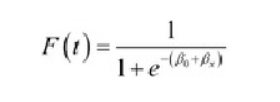

THe logit function is inverse of logistic function it recoverts the eqaution back to linear form 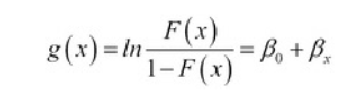

In [61]:
#Spam Filtering Problem

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('sms.csv')

In [64]:
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [65]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [66]:
df['label'].value_counts()

0    4827
1     747
Name: label, dtype: int64

In [67]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
from sklearn.model_selection import train_test_split,cross_val_score

In [70]:
X_train_raw,X_test_raw,Y_train,Y_test = train_test_split(df['message'],df['label'])

In [71]:
#User TFIDF vectorizer to fit training and test messages
vectorizer = TfidfVectorizer()

In [72]:
X_train = vectorizer.fit_transform(X_train_raw)

In [73]:
X_test = vectorizer.transform(X_test_raw)

In [74]:
#Create an instance of Logistict Regression to fit and predict data
classifer = LogisticRegression()

In [75]:
classifer.fit(X_train,Y_train)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_pred = classifer.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
Y_test

5336    0
3226    0
465     0
3491    0
2524    0
       ..
4935    0
3926    0
4708    0
3435    0
3361    0
Name: label, Length: 1394, dtype: int64

In [98]:
confusion_matrix = confusion_matrix(Y_test,y_pred)

In [99]:
print(confusion_matrix)

[[1201    0]
 [  40  153]]


In [101]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Predicted Values')

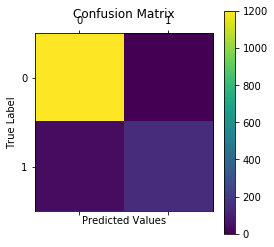

In [103]:
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Values')

In [104]:
#Models Accuracy

from sklearn.metrics import accuracy_score

In [105]:
Accuracy = accuracy_score(Y_test,y_pred)

In [106]:
Accuracy

0.9713055954088953

In [107]:
scores = cross_val_score(classifer,X_train,Y_train,cv=5)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
print(np.mean(scores))

0.9521522217693542


In [109]:
scores

array([0.94982079, 0.95933014, 0.9569378 , 0.94856459, 0.94610778])

In [111]:
precisions = cross_val_score(classifer,X_train,Y_train,cv=5,scoring='precision') 

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
print('Mean values of Precision is:',np.mean(precisions))

Mean values of Precision is: 0.9916663783950634


In [113]:
print('Range of precision values are:',precisions)

Range of precision values are: [0.98591549 0.98734177 1.         1.         0.98507463]


In [114]:
recalls = cross_val_score(classifer,X_train,Y_train,cv=5,scoring='recall') 

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
print('Mean values of Recall is:',np.mean(recalls))
print('Range of recall values are:',recalls)

Mean values of Recall is: 0.6443243243243244
Range of recall values are: [0.63063063 0.7027027  0.67567568 0.61261261 0.6       ]


In [117]:
#Calculating F1 scores

F1 score is an harmonic or wieghted average of Preciosion and recall scores given by -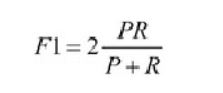

In [118]:
f1s = cross_val_score(classifer,X_train,Y_train,cv=5,scoring='f1') 
print('Mean values of F1s is:',np.mean(f1s))
print('Range of F1 values are:',f1s)

Mean values of F1s is: 0.7804548523780397
Range of F1 values are: [0.76923077 0.82105263 0.80645161 0.75977654 0.74576271]


C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [119]:
from sklearn.metrics import roc_curve, auc

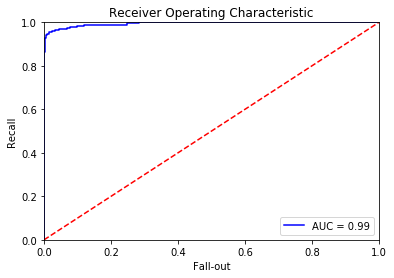

In [123]:
predictions = classifer.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(Y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

Hyperparameter Tuning with Grid Search

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [128]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())])

In [131]:
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10)}

In [132]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

In [136]:
X, y, = df['message'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [137]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  9.1min finished
C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [140]:
print('Best score: %0.3f:',grid_search.best_score_)
    
   

Best score: %0.3f: 0.9844497607655502


In [142]:
 best_parameters = grid_search.best_estimator_.get_params()

In [144]:
for param_name in sorted(parameters.keys()):
        print('\t%s: %r',(param_name, best_parameters[param_name]))

	%s: %r ('clf__C', 10)
	%s: %r ('clf__penalty', 'l2')
	%s: %r ('vect__max_df', 0.5)
	%s: %r ('vect__max_features', 5000)
	%s: %r ('vect__ngram_range', (1, 2))
	%s: %r ('vect__norm', 'l2')
	%s: %r ('vect__stop_words', None)
	%s: %r ('vect__use_idf', True)


In [149]:
predictions = grid_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))


Accuracy: 0.9791965566714491
